# Geopandas

Geopandasは，データ解析ライブラリpandasと，空間データライブラリshapelyとfionaを用いて，空間データを扱う。

Geopandasで扱われるデータ構造は，GeoSeriesとGeoDataFrameである。Pandasで扱われるデータ構造SeriesとDataFrameでの操作方法と共通している。

In [3]:
!pip install geopandas
!pip install numpy 
!pip install pandas

In [4]:
import geopandas as gpd

https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_4.html
にあるデータを用いる。

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd

In [114]:
#fp="data/N03-20200101_14_GML/N03-20_14_200101.geojson"
fp="data/N03-20200101_14_GML/N03-20_14_200101.shp" #神奈川県の行政区ファイル
df = gpd.read_file(fp,encoding='SHIFT-JIS') #神奈川県

# geopandas.geodataframe.GeoDataFrame
type(df)

#都道府県名（N03_001）	当該区域を含む都道府県名称	文字列型（CharacterString）
#支庁・振興局名（N03_002）
#郡・政令都市名（N03_003）
#市区町村名（N03_004）	当該行政区の市区町村の名称	文字列型（CharacterString）
#行政区域コード（N03_007）

df.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.65311 35.49988, 139.65301 35.499..."
1,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.67500 35.45944, 139.67466 35.459..."
2,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.67598 35.45631, 139.67603 35.456..."
3,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.67676 35.45763, 139.67671 35.457..."
4,神奈川県,None,横浜市,鶴見区,14101,"POLYGON ((139.70833 35.47090, 139.70765 35.471..."


神奈川県をプロットする。

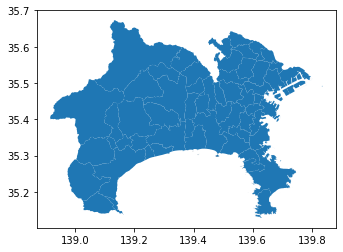

In [115]:
df.plot()

N03_003列の値が，相模原市のみの行のみを取り出す。

In [116]:
df_sagamihara=df[df['N03_003']=='相模原市']

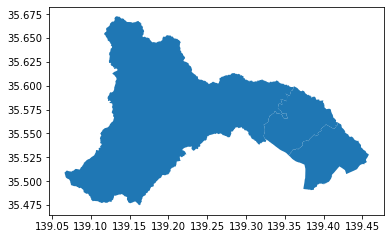

In [117]:
df_sagamihara.plot()

N03_003列の値が，相模原市，かつ，N03_004列の値が中央区の行のみを取り出す。

In [118]:
df_chuo=df[(df['N03_003']=='相模原市') & (df['N03_004']=="中央区")]

`df`のデータ型は，GeoDataFrameである。

In [119]:
type(df)

geopandas.geodataframe.GeoDataFrame

そして，`df`の`geometry`列はGeoSeriesである。

In [120]:
type(df['geometry'])

geopandas.geoseries.GeoSeries

In [121]:
df['geometry']

0       POLYGON ((139.65311 35.49988, 139.65301 35.499...
1       POLYGON ((139.67500 35.45944, 139.67466 35.459...
2       POLYGON ((139.67598 35.45631, 139.67603 35.456...
3       POLYGON ((139.67676 35.45763, 139.67671 35.457...
4       POLYGON ((139.70833 35.47090, 139.70765 35.471...
                              ...                        
1284    POLYGON ((139.14643 35.16697, 139.14643 35.166...
1285    POLYGON ((139.14650 35.16736, 139.14654 35.167...
1286    POLYGON ((139.12500 35.14962, 139.12499 35.149...
1287    POLYGON ((139.34756 35.50000, 139.34758 35.499...
1288    POLYGON ((139.25000 35.46013, 139.24955 35.460...
Name: geometry, Length: 1289, dtype: geometry

`df['geometry']`に含まれるのは，`POLYON`である。この，`df['geometry']`に含まれるPOLYGONに対しては，Shapelyのmethodを用いることができる。

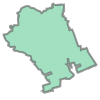

In [122]:
df.at[0,"geometry"]

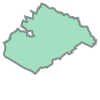

In [123]:
df_chuo.at[91,"geometry"]

In [124]:
print(df.at[11,'N03_003'],df.at[12,'N03_004'])
print(df.at[92,'N03_003'],df.at[92,'N03_004'])

横浜市 西区
相模原市 中央区


GeoDataFrameの列にある値を重複を除いて表示するには，`unique`を用いる。

In [125]:
df['N03_003'].unique()

array(['横浜市', '川崎市', '相模原市', None, '三浦郡', '高座郡', '中郡', '足柄上郡', '足柄下郡',
       '愛甲郡'], dtype=object)

これらの値を用いて，データをグループ化するには，次のようにする。得られるデータ型は，DataFrameGroupByとなる。

In [126]:
grouped = df.groupby('N03_003')

# Let's see what we have
grouped

grouped.groupsはキーを持つ。

In [127]:
grouped.groups.keys()

dict_keys(['三浦郡', '中郡', '川崎市', '愛甲郡', '横浜市', '相模原市', '足柄上郡', '足柄下郡', '高座郡'])

各グループが持つデータ数を表示するには，反復文を用いるとよい。

In [128]:
for key,group in grouped:
    print('Terrain class:',key)
    print('Number of rows:',len(group),"\n")

Terrain class: 三浦郡
Number of rows: 166 

Terrain class: 中郡
Number of rows: 3 

Terrain class: 川崎市
Number of rows: 36 

Terrain class: 愛甲郡
Number of rows: 2 

Terrain class: 横浜市
Number of rows: 54 

Terrain class: 相模原市
Number of rows: 4 

Terrain class: 足柄上郡
Number of rows: 5 

Terrain class: 足柄下郡
Number of rows: 81 

Terrain class: 高座郡
Number of rows: 1 



In [81]:
grouped.groups["相模原市"]

Int64Index([90, 91, 92, 93], dtype='int64')

In [129]:
print(df.loc[90,:])
print(df.loc[91,:])
print(df.loc[92,:])
print(df.loc[93,:])

N03_001                                                  神奈川県
N03_002                                                  None
N03_003                                                  相模原市
N03_004                                                    緑区
N03_007                                                 14151
geometry    POLYGON ((139.12418975 35.47847251, 139.124085...
Name: 90, dtype: object
N03_001                                                  神奈川県
N03_002                                                  None
N03_003                                                  相模原市
N03_004                                                   中央区
N03_007                                                 14152
geometry    POLYGON ((139.325 35.54413700000001, 139.32496...
Name: 91, dtype: object
N03_001                                                  神奈川県
N03_002                                                  None
N03_003                                                  相模原市
N03_004               

In [90]:
df.columns

Index(['N03_001', 'N03_002', 'N03_003', 'N03_004', 'N03_007', 'geometry'], dtype='object')

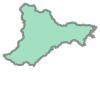

In [132]:
df.at[90,"geometry"]

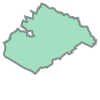

In [133]:
df.at[91,"geometry"]

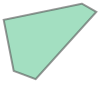

In [134]:
df.at[92,"geometry"]

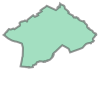

In [135]:
df.at[93,"geometry"]

## 座標系 (CRS)

Geopandasdの座標系の取り扱いを述べる。

ここ　https://github.com/dataofjapan/land 　のデータを用いる。

In [140]:
import geopandas as gpd

# Read the file
fp = "data/japan.geojson"
data = gpd.read_file(fp, driver="GeoJSON")



In [141]:
data

,nam,nam_ja,id,geometry
0,Kyoto Fu,京都府,26,"MULTIPOLYGON (((135.03670 35.53733, 135.03520 ..."
1,Saga Ken,佐賀県,41,"MULTIPOLYGON (((129.86220 33.58753, 129.85770 ..."
2,Kumamoto Ken,熊本県,43,"MULTIPOLYGON (((131.11040 33.18313, 131.11479 ..."
3,Kagawa Ken,香川県,37,"MULTIPOLYGON (((134.33200 34.56313, 134.33510 ..."
4,Aichi Ken,愛知県,23,"MULTIPOLYGON (((136.96091 35.41453, 136.96300 ..."
5,Tochigi Ken,栃木県,9,"POLYGON ((139.96140 37.15353, 139.96370 37.148..."
6,Yamanashi Ken,山梨県,19,"POLYGON ((138.37030 35.97147, 138.37180 35.971..."
7,Shiga Ken,滋賀県,25,"POLYGON ((136.14999 35.69780, 136.15710 35.700..."
8,Gunma Ken,群馬県,10,"POLYGON ((138.64430 36.41153, 138.64220 36.413..."
9,Miyagi Ken,宮城県,4,"MULTIPOLYGON (((141.48390 38.97847, 141.48550 ..."


読み込まれたデータの座標系は，`crs`で確認できる。

In [142]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

ここで，EPGS番号が座標系を示す重要な情報である。この番号がわかれば，用いられている座標系について詳しく知ることができる。https://epsg.org/home.html

実際に保存されている情報を，`data['geometry']`で確認する。

In [144]:
data['geometry'].head()

0    MULTIPOLYGON (((135.03670 35.53733, 135.03520 ...
1    MULTIPOLYGON (((129.86220 33.58753, 129.85770 ...
2    MULTIPOLYGON (((131.11040 33.18313, 131.11479 ...
3    MULTIPOLYGON (((134.33200 34.56313, 134.33510 ...
4    MULTIPOLYGON (((136.96091 35.41453, 136.96300 ...
Name: geometry, dtype: geometry

これらの値を見ると，緯度経度で保存されているようであることがわかる。順番は，経度，緯度，の順である。ここでは，異なった座標系でのデータを観察する。

現在の WGS84でのデータをコピーしてバックアップしておく。そして，ヨーロッパで用いられている3035にcrsを変換する。

In [145]:
data_wgs84=data.copy()
data=data.to_crs(epsg=3035)
data['geometry'].head() #変換後の値を確認

0    MULTIPOLYGON (((9888694.578 9261109.949, 98885...
1    MULTIPOLYGON (((10330456.781 8747874.139, 1033...
2    MULTIPOLYGON (((10321073.483 8870442.954, 1032...
3    MULTIPOLYGON (((10025904.847 9195126.058, 1002...
4    MULTIPOLYGON (((9799237.175 9443763.878, 97985...
Name: geometry, dtype: geometry

変換後のデータは，緯度経度とはことなく値で表されていることがわかる。座標系を確認するため，`data.crs`を実行する。

In [146]:
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - LCC & LAEA
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

変換前の座標系での地図と変換後の座標系での地図を表示する。

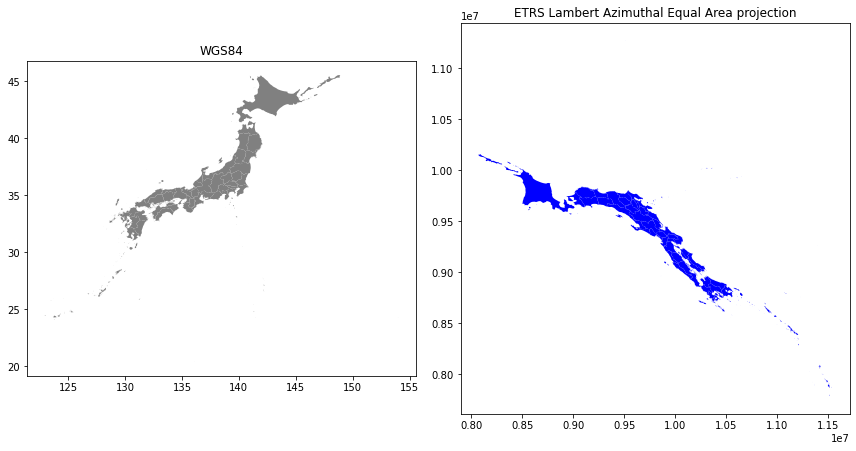

In [147]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor='gray')

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue')

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

### 世界地図の表示
世界地図を異なる座標系で表示する。
まずは，Shapefileを読み込む。

In [151]:
fp = "data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp" 
admin = gpd.read_file(fp)

In [152]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

座標系を確認すると， EPSG4326であることがわかる。これを，描画する。

Text(0.5, 1.0, 'WGS84')

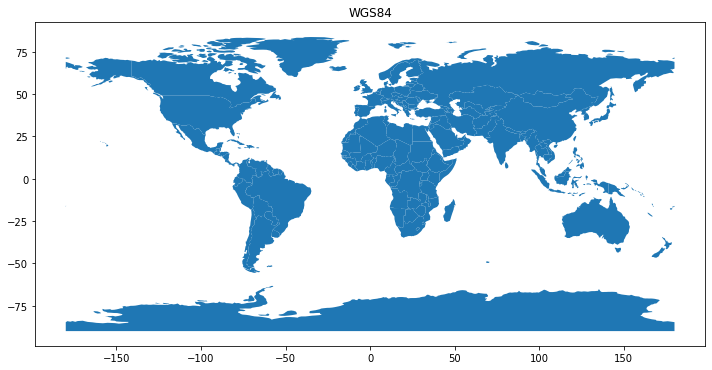

In [153]:
# Set fig size
plt.rcParams['figure.figsize'] = [12, 6]
#Plot in original crs
admin.plot()
plt.title("WGS84")

次にこのデータをWebメルカトールに変換する。WebメルカトールのEPSG番号は，3785である。ここでは，CRSを変換するのに`pyproj`パッケージの`CRS`を用いる。

In [155]:
from pyproj import CRS

Text(0.5, 1.0, 'Web mercator')

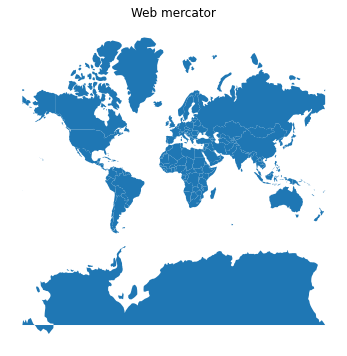

In [156]:
# Define projection as web mercator, 3785
web_mercator = CRS.from_epsg(3785)

# Re-project and plot
admin.to_crs(web_mercator).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Web mercator")

エケルト図法（第４図法）

Text(0.5, 1.0, 'Eckert IV')

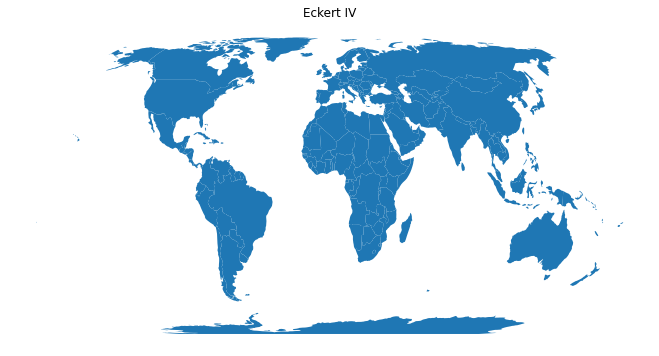

In [157]:
# Define projection Eckert IV from https://spatialreference.org/ref/esri/54012/
eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Re-project and plot
admin.to_crs(eckert_IV).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Eckert IV")

正投影図法

Text(0.5, 1.0, 'Orthographic')

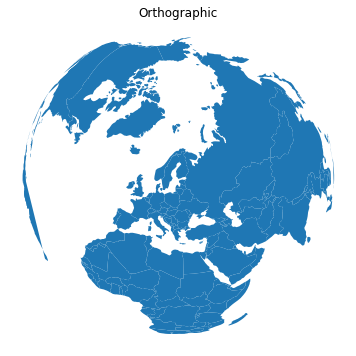

In [158]:
# Define an orthographic projection, centered in Finland! from: http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html
ortho = CRS.from_proj4("+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

# Re-project and plot
admin.to_crs(ortho).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Orthographic")